In [49]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M
from scipy.optimize import fsolve

In [69]:
# Import Data from Simple Model

%store -r var_1_1
%store -r var_1_2 
%store -r var_1_3 
%store -r var_1_4
T_0_1, T_2_1, rho_0_1, rho_2_1 = var_1_1,var_1_2,var_1_3,var_1_4

%store -r var_2_1
%store -r var_2_2 
T_0_2, T_2_2= var_2_1, var_2_2

%store -r var_3 
Delta_T_3 = var_3

%store -r var_4 
W_4 = var_4

%store -r var_5 
W_5 = var_5

# Simple, conceptual model of marginal sea

In [52]:
############ Initilisation #################
############################################

#### Constants #####
L_x = 1e6                                          # [m] zonal extent 
L_y = 2e6                                          # [m] meridional extent 
A = L_x*L_y                                        # [m^2] surface area of interior 
P = 2*L_x+2*L_y                                    # [m] Perimeter 

g = 9.81                                           # [m/s^2] gravitational acceleration 
C_p = 3.994e3                                      # [J/(kg K)] specific heat capacity of sea water 
s = 0.02                                           # [] average bottom slope around the perimeter of the marginal sea
f_0 = 1.2e-4                                       # [s^-1] Coriolis parameter 
alpha_T = 0.2                                      # [kg m^-3 C^-1] thermal expansion coefficient; source: Ypma[2020]
alpha_S = 0.8                                      # [kg m^-3] Haline expansion coefficient
rho_ref = 1023.6                                   # [kg m^-3] reference density sea water; source: Wikipedia
T_ref = 25                                         # [Celcius] reference temperature sea water; source: Wikipedia
S_ref = 35                                         # [ppt] reference salinity sea water; source: Wikipedia

#### Parameters ####
num_val = 10
A_T_1 = np.append(8.87, np.linspace(7,11,num_val))       # [Celsius] ingoing temperature 
A_S_1 = np.append(35.2, np.linspace(34.6,35.3,num_val))  # [g kg^-1] incoming salinity; source Lamber ! is ppt = g kg^-1 ???
A_T_A = np.append(2.8, np.linspace(0,7,num_val))         # [Celsius] Atmospheric temperature 
A_E = np.append(-2e-8,np.linspace(0,-5e-8,num_val))      # [ppt] net evaporation minus precipitation
A_Gamma = np.append(10,np.linspace(4,60,num_val))        # [W/(m^2 C)] Restoring strength 
A_H = np.append(1000, np.linspace(600,1200,num_val))     # [m] sill height 
A_c = np.append(0.006, np.linspace(0.003,0.009,num_val)) # [] eddy coefficient 

#### Preparation #####
T_0 = np.zeros(num_val)
T_2 = np.zeros(num_val)
S_0 = np.zeros(num_val)
S_2 = np.zeros(num_val)
A_rho_0 = np.zeros(num_val)
A_rho_1 = np.zeros(num_val)
A_rho_2 = np.zeros(num_val)
A_W = np.zeros(num_val)
Delta_T = np.zeros(num_val)

In [53]:
############# Computation ##################
############################################

#### Main equations ####

def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
    return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(rho_ref*C_p),
            P*H*x[6]+A*E*S_ref,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(rho_ref*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S_ref+P*L*E*S_ref,
            g*H/(2*rho_ref*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]

#### Follow up computations ####

#Densities -> not sure they are correct though..
def density(T, S):                           # rho_1(T_1,T_0,S_1,S_0), rho_2(T_2,T_0,S_2,S_0)
    return rho_ref+((alpha_T*(T-T_ref) - alpha_S*(S-S_ref)))

#Downwelling/Medidional overturning strength at the sill [m^2/s]
def downwelling(rho_0, rho_1, rho_2, H):
    return g*H**2*(rho_1 - rho_2)/(4*rho_0*f_0)

Five different plots:
* eddy coefficients against interior and outgoing
    * temperature, salt, density
    * both models
* restoring strength against interior and outgoing
    * temperature, salt
    * both models
* temperature both models
    * $T_1-T_0$
* meridional overturning strength
    * $W$ against $H$ 
    * both models
    
* meridional overturning strength
    * $W$ against $T_1$
    * both models

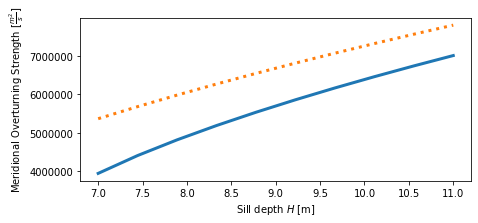

In [70]:
################ Output ####################
############################################

y=5

if y==1:          ######## Varying Eddy Coefficient c ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[1::][i], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0] 
        L = H/s  # width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_rho_0[i]=density(T_0[i], S_0[i])
        A_rho_1[i]=density(T_1, S_1)
        A_rho_2[i]=density(T_2[i], S_2[i])
        A_W[i] = downwelling(A_rho_0[i], A_rho_1[i], A_rho_2[i], H)
        
    x_values = A_c[1::] 
    y_values = [T_0, T_0_1, T_2, T_2_1, S_0,S_2, A_rho_0, rho_0_1, A_rho_2, rho_2_1] #, A_Q, A_Delta, A_W
    xlabel = r'Eddy Coefficient $c$ []'
    ylabel = ['Temperature [°C]', 'Salinity [ppt]', r'Density [$\frac{kg}{m^3}$]']
    label = [r'$T_0$(salt)',r'$T_0$(simple)', r'$T_2$(salt)',r'$T_2$(simple)', r'$S_2$(salt)', r'$S_2$(salt)', r'$\rho_0$(salt)',r'$\rho_0$(simple)', r'$\rho_2$(salt)', r'$\rho_2$(simple)']  # more labels when simple code is included
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 3))
    axs[0].plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs[0].plot(x_values, y_values[1], linewidth=3, label=label[1], linestyle=':')
    axs[0].plot(x_values, y_values[2], linewidth=3, label=label[2])
    axs[0].plot(x_values, y_values[3], linewidth=3, label=label[3],linestyle=':')
    axs[0].set(xlabel=xlabel, ylabel=ylabel[0])
    axs[0].legend(loc='best')
    axs[1].plot(x_values, y_values[4], linewidth=3, label=label[4])
    axs[1].plot(x_values, y_values[5], linewidth=3, label=label[5])
    axs[1].set(xlabel=xlabel, ylabel=ylabel[1])
    axs[1].legend(loc='best')
    axs[2].plot(x_values, y_values[6], linewidth=3, label=label[6])
    axs[2].plot(x_values, y_values[7], linewidth=3, label=label[7], linestyle=':')
    axs[2].plot(x_values, y_values[8], linewidth=3, label=label[8])
    axs[2].plot(x_values, y_values[9], linewidth=3, label=label[9], linestyle=':')
    axs[2].set(xlabel=xlabel, ylabel=ylabel[2])
    axs[2].legend(loc='best')
    fig.suptitle('Trial')
    plt.show()
    #plt.savefig('Delta_c.png', dpi=300, bbox_inches='tight')       
    
elif y==2:          ######## Varying Restoring strength Gamma ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[1::][i], A_H[0] 
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        
    x_values = A_Gamma[1::] 
    y_values = [T_0, T_0_2, T_2, T_2_2, S_0, S_2]
    xlabel = r'Eddy Coefficient $c$ []'
    ylabel = ['Temperature [°C]', 'Salinity [ppt]']
    label = [r'$T_0(salt)$', r'$T_0(simple)$', r'$T_2$(salt)', r'$T_2$(simple)', r'$S_2$(salt)', r'outgoing $S_2$(salt)']  # more labels when simple code is included
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 3))
    axs[0].plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs[0].plot(x_values, y_values[1], linewidth=3, label=label[1], linestyle=':')
    axs[0].plot(x_values, y_values[2], linewidth=3, label=label[2])
    axs[0].plot(x_values, y_values[3], linewidth=3, label=label[3], linestyle=':')
    axs[0].set(xlabel=xlabel, ylabel=ylabel[0])
    axs[0].legend(loc='best')
    axs[1].plot(x_values, y_values[4], linewidth=3, label=label[4])
    axs[1].plot(x_values, y_values[5], linewidth=3, label=label[5])
    axs[1].set(xlabel=xlabel, ylabel=ylabel[1])
    axs[1].legend(loc='best')
    fig.suptitle('Trial')
    plt.show()
    #plt.savefig('Delta_c.png', dpi=300, bbox_inches='tight')   

if y==3:          ######## Delta T ##########
    c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0] 
    L = H/s  # [m] width of sloping topography of the boundary current 
        
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
    Delta_T[i] = T_1-T_0[i]
        
    x_values = Delta_T
    y_values = Delta_T_3 
    xlabel = r'$T_1-T_0$ salt model [°C]'
    ylabel = '$T_1-T_0$ simple model [°C]'
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 3))
    axs.plot(x_values, y_values, linewidth=3)
    axs.set(xlabel=xlabel, ylabel=ylabel)
    
if y==4:          ######## Downwelling with Sill Depth ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[1::][i] 
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_W[i] = downwelling(density(T_0[i], S_0[i]), density(T_1, S_1), density(T_2[i], S_2[i]), H)

    x_values = A_H[1::]
    y_values = A_W, W_4
    xlabel = 'Sill Depth $H$ [m]'
    ylabel =  r'Meridional Overturning Strength [$\frac{m^2}{s}$]'
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 3))
    axs.plot(x_values, y_values[0], linewidth=3)
    axs.plot(x_values, y_values[1], linewidth=3, linestyle=':')
    axs.set(xlabel=xlabel, ylabel=ylabel)
    
if y==5:          ######## Downwelling with incoming Tempereature ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[1::][i] , A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0]
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_W[i] = downwelling(density(T_0[i], S_0[i]), density(T_1, S_1), density(T_2[i], S_2[i]), H)

    x_values = A_T_1[1::]
    y_values = A_W, W_5
    xlabel = 'Sill depth $H$ [m]'
    ylabel =  r'Meridional Overturning Strength [$\frac{m^2}{s}$]'
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 3))
    axs.plot(x_values, y_values[0], linewidth=3)
    axs.plot(x_values, y_values[1], linewidth=3, linestyle=':')
    axs.set(xlabel=xlabel, ylabel=ylabel)